# CRO Algorithm examples

## Example I: max_ones problem

('[*Running] Initialization: ', 'max')


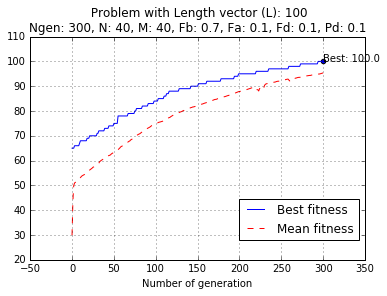

('Best coral: ', array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1]))
('Best solution:', 100.0)
CPU times: user 24.9 s, sys: 392 ms, total: 25.3 s
Wall time: 24.8 s


In [1]:
import numpy as np
import seaborn as sns 
from cro import *
from fitness import max_ones

## ------------------------------------------------------
## Parameters initialization

Ngen = 300                 # Number of generations
N  = 40                    # MxN: reef size
M  = 40                    # MxN: reef size
Fb = 0.7                   # Broadcast prob.
Fa = 0.1                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 100
ke = 0.2
## ------------------------------------------------------

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, max_ones, opt, L, verbose=False, ke=ke)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit()

## Example II: feature selection Classification (max auc)

https://www.kaggle.com/primaryobjects/voicegender

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. It contains 20 features and I added 10 noisy!

('[*Running] Initialization: ', 'max')
('Reef initialization:', 0.74183673469387756)
('Best-fitness:', 0.74183673469387756, '\n', '0.0% completado \n')
('Best-fitness:', 0.87594583831142969, '\n', '25.0% completado \n')
('Best-fitness:', 0.98204607046070469, '\n', '50.0% completado \n')
('Best-fitness:', 0.96265923566878975, '\n', '75.0% completado \n')
('Best-fitness:', 0.9951378925553962, '\n', '100% completado \n')


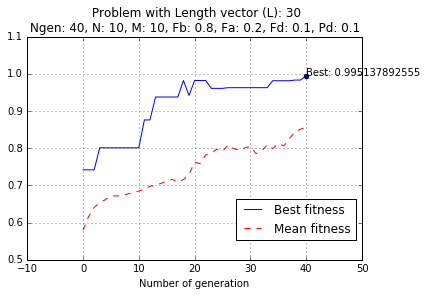

('Best coral: ', array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0]))
('Best solution:', 0.9951378925553962)
CPU times: user 1min 25s, sys: 436 ms, total: 1min 25s
Wall time: 1min 25s
['meanfreq' 'sd' 'median' 'Q25' 'Q75' 'IQR' 'sp.ent' 'mode' 'centroid'
 'meanfun' 'minfun' 'maxfun' 'mindom' 'modindx']


In [2]:
from functools import partial
import numpy as np
import seaborn as sns 
from cro import *
from utils import load_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from fitness import feature_selection

## ------------------------------------------------------
## Parameters initialization
## ------------------------------------------------------
Ngen = 40                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
## ------------------------------------------------------

dataset = load_data('voice')
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

clf = KNeighborsClassifier(2)

fitness_coral = partial(feature_selection, X=X, y=y, model=clf,
                        get_prediction = lambda clf, X: clf.predict_proba(X)[:, 1], 
                        metric=roc_auc_score)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, fitness_coral, opt, L, seed=13, verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)

names = np.array(dataset.feature_names)
print(names[REEFpob[ind_best, :]>0])

## Example III: feature selection, regression (min mse)

('[*Running] Initialization: ', 'min')
('Reef initialization:', 4.8733148870110314)
('Best-fitness:', 4.4309313512400585, '\n', '0.0% completado \n')
('Best-fitness:', 4.3420887752890662, '\n', '16.6666666667% completado \n')
('Best-fitness:', 4.2676950723575748, '\n', '33.3333333333% completado \n')
('Best-fitness:', 4.2676950723575748, '\n', '50.0% completado \n')
('Best-fitness:', 4.2676950723575748, '\n', '66.6666666667% completado \n')
('Best-fitness:', 4.2676950723575748, '\n', '83.3333333333% completado \n')
('Best-fitness:', 4.2676950723575748, '\n', '100% completado \n')


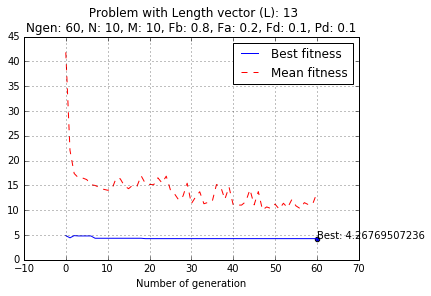

('Best coral: ', array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
('Best solution:', 4.2676950723575748)
CPU times: user 6min 13s, sys: 492 ms, total: 6min 14s
Wall time: 6min 13s
['CRIM' 'ZN' 'INDUS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B'
 'LSTAT']


In [3]:
import numpy as np
import seaborn as sns 
from sklearn import datasets, ensemble
from sklearn.metrics import r2_score, mean_squared_error   
from cro import *
from fitness import feature_selection

## ------------------------------------------------------
## Parameters initialization
## ------------------------------------------------------
Ngen = 60                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                     # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'min'                 # flag: 'max' for maximizing and 'min' for minimizing

## ------------------------------------------------------

dataset = datasets.load_boston()
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

params = {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 2}
gbr = ensemble.GradientBoostingRegressor(**params)  

fitness_coral = partial(feature_selection, X=X, y=y, model=gbr,
                        get_prediction=lambda gbr, X: gbr.predict(X), 
                        metric=mean_squared_error)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, fitness_coral, opt, L, verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, gbr)

names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
print(names[REEFpob[ind_best, :]>0])